In [2]:
import numpy as np
from PIL import Image
import os

# Remap ScanNet20 ids to nyu40ids

In [3]:
def scannet_color_palette():
	return [
		(0, 0, 0),           # undefined
		(174, 199, 232),     # wall
		(152, 223, 138),     # floor
		(31, 119, 180),      # cabinet
		(255, 187, 120),     # bed
		(188, 189, 34),      # chair
		(140, 86, 75),       # sofa
		(255, 152, 150),     # table
		(214, 39, 40),       # door
		(197, 176, 213),     # window
		(148, 103, 189),     # bookshelf
		(196, 156, 148),     # picture
		(23, 190, 207),      # counter
		(178, 76, 76),  
		(247, 182, 210),     # desk
		(66, 188, 102), 
		(219, 219, 141),     # curtain
		(140, 57, 197), 
		(202, 185, 52), 
		(51, 176, 203), 
		(200, 54, 131), 
		(92, 193, 61),  
		(78, 71, 183),  
		(172, 114, 82), 
		(255, 127, 14),      # refrigerator
		(91, 163, 138), 
		(153, 98, 156), 
		(140, 153, 101),
		(158, 218, 229),     # shower curtain
		(100, 125, 154),
		(178, 127, 135),
		(120, 185, 128),
		(146, 111, 194),
		(44, 160, 44),       # toilet
		(112, 128, 144),     # sink
		(96, 207, 209), 
		(227, 119, 194),     # bathtub
		(213, 92, 176), 
		(94, 106, 211), 
		(82, 84, 163),       # otherfurn
		(100, 85, 144)
	]

def scannet_main_ids():
	return [
		0,
		1,   
		2,   
		3,   
		4,   
		5,   
		6,   
		7,   
		8,   
		9,   
		10,  
		11,  
		12,  
		14,  
		16,  
		24,  
		28,  
		33,  
		34,  
		36,  
		39  
	]

VALID_CLASS_IDS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 24, 28, 33, 34, 36, 39]


In [4]:
# scene_dir = '/project/fsun/data/scannet/test_frames_2d'
# scene_id = 'submission_preds'

# # pred_dir = 'color_resized'
# img_path = os.path.join(scene_dir, scene_id, 'scene0712_00_000000.png')
# color = Image.open(img_path)
# color

In [10]:
orginal_class_ids = np.asarray(VALID_CLASS_IDS)

scene_dir = '/project/fsun/data/scannet/test_frames_2d/scannet_frames_test'
pred_dir = '2d_benchmark_preds'

for scene_id in os.listdir(scene_dir):
    
    for img_name in os.listdir(os.path.join(scene_dir, scene_id, pred_dir)):
    
        img_path = os.path.join(scene_dir, scene_id, pred_dir, img_name)

        semantic = Image.open(img_path)

        semantic = np.array(semantic)
        print(np.unique(semantic))
        remapped_pred = np.array([orginal_class_ids[int(s)] for s in semantic.flatten().squeeze()-1])
        remapped_pred = remapped_pred.reshape(480, 640).astype(np.uint8)
        print(np.unique(remapped_pred))

        remapped_pred = Image.fromarray(remapped_pred)
        remapped_pred = remapped_pred.resize(size=(1296, 968), resample=0)

        remapped_pred.save(os.path.join('/project/fsun/data/scannet/test_frames_2d/submission_preds', f'{scene_id}_{img_name}'))


In [45]:


# rgb_map = [scannet_color_palette()[i] for i in scannet_main_ids()] 

# semantic_rgb = np.array([rgb_map[int(s)] for s in np.array(semantic).flatten().squeeze()])
# semantic_rgb = semantic_rgb.reshape(480, 640, 3)
# semantic_rgb = semantic_rgb.astype(np.uint8)

# Image.fromarray(semantic_rgb)

In [36]:
semantic = np.array(semantic)
print(np.unique(semantic))
orginal_class_ids = np.asarray(VALID_CLASS_IDS)
remapped_pred = np.array([orginal_class_ids[int(s)] for s in semantic.flatten().squeeze()-1])
remapped_pred = remapped_pred.reshape(480, 640).astype(np.uint8)
print(np.unique(remapped_pred))



[ 1  2  5  7  8 11 13 20]
[ 1  2  5  7  8 11 14 39]


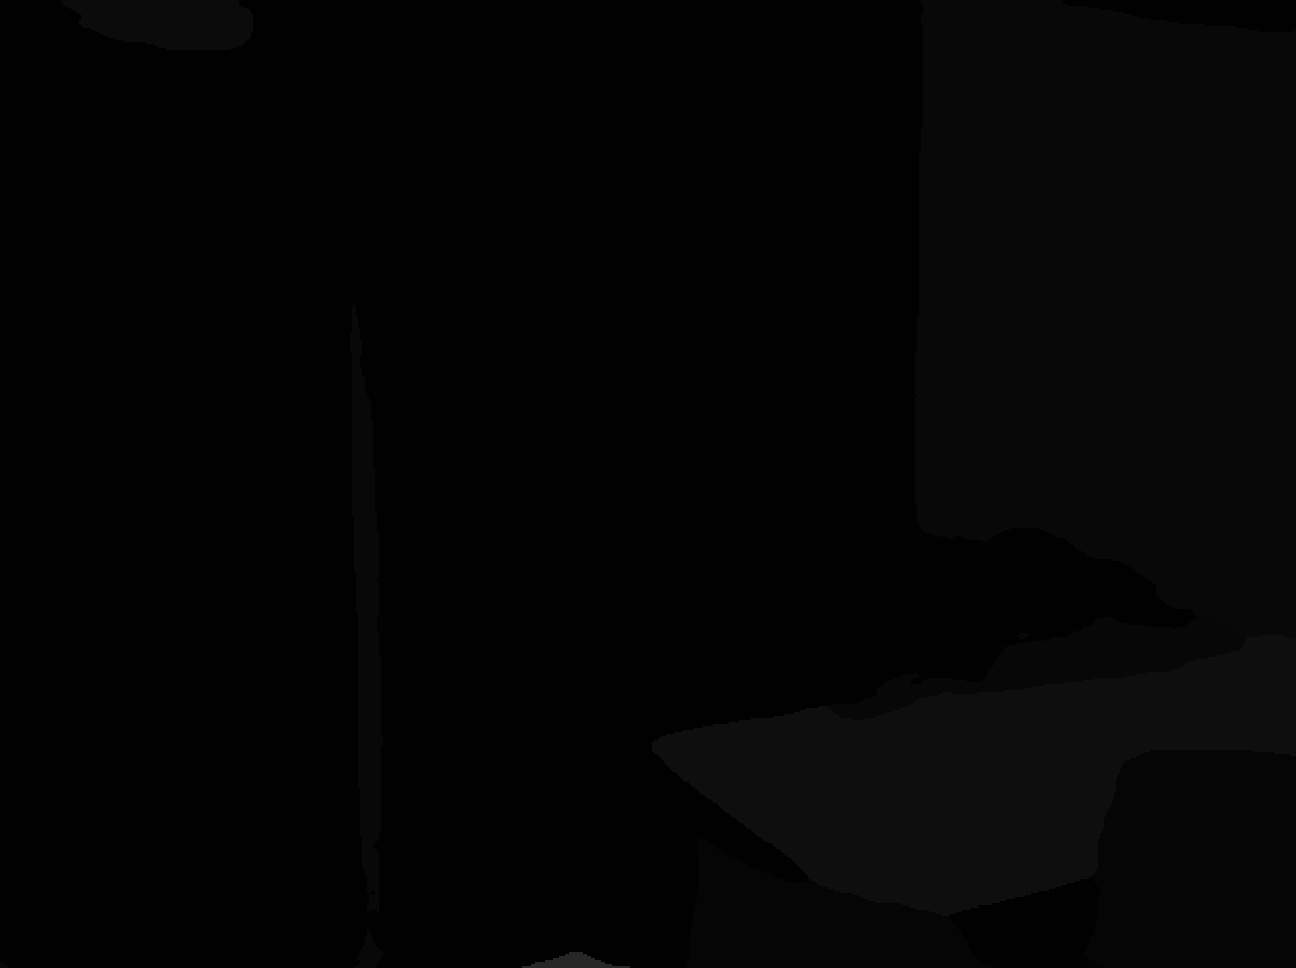

In [41]:
# load ground truth semantics
remapped_pred = Image.fromarray(remapped_pred)
remapped_pred = remapped_pred.resize(size=(1296, 968), resample=0)


# remapped_pred.save(os.path.join('/project/fsun/data/scannet/test_frames_2d/submission_preds', f'{scene_id}_{img_name}'))



In [42]:
temp = np.array(remapped_pred)

In [44]:
np.unique(temp)

array([ 1,  2,  5,  7,  8, 11, 14, 39], dtype=uint8)